#                                                 Titanic Survival


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
from sklearn.linear_model import LinearRegression
linr=LinearRegression()

## Read data

In [ ]:
train=pd.read_csv("train.csv")

In [57]:
test=pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [6]:
train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


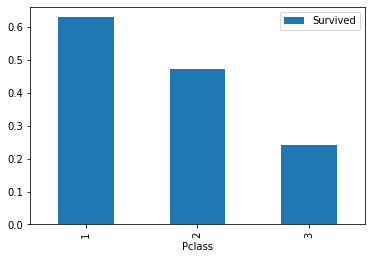

In [7]:
train.groupby('Pclass').mean()[['Survived']].plot(kind='bar')

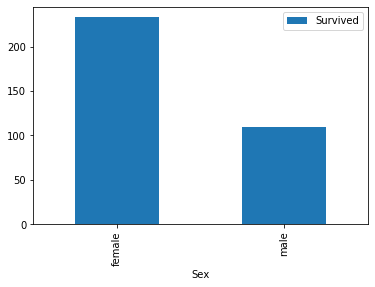

In [8]:
train.groupby('Sex').sum()[['Survived']].plot(kind='bar')


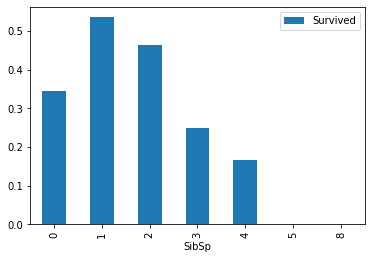

In [9]:
train.groupby('SibSp').mean()[['Survived']].plot(kind='bar')

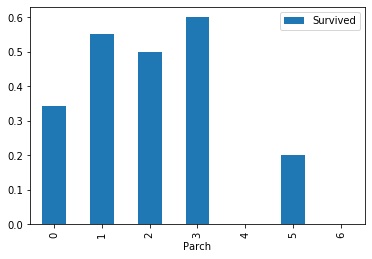

In [10]:
train.groupby('Parch').mean()[['Survived']].plot(kind='bar')

In [11]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

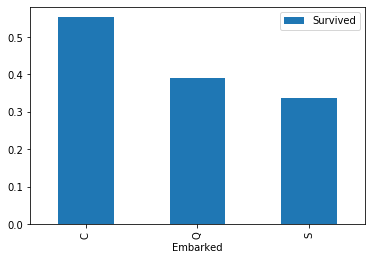

In [12]:
train.groupby('Embarked').mean()[['Survived']].plot(kind='bar')

In [13]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


##  Data Wrangling and Feature extraction

In [27]:
train['Embarked'].dropna(inplace=True)

train.drop(columns={'Name','Cabin','Ticket'},inplace=True)

train=pd.get_dummies(train,columns=['Sex','Embarked'],drop_first=True)

age_train=train[train['Age'].isna()==False]

age_test=train[train['Age'].isna()]

In [33]:
X=age_train.drop('Age',1)
y=age_train['Age']
X=scaler().fit_transform(X)
X.shape

(714, 9)

In [41]:
test_age=age_test.drop('Age',1)

linr.fit(X,y)

test_age['Age']=linr.predict(test_age)

test_age['Age'].round()

train=pd.concat([age_train,test_age])

In [43]:
train.drop('PassengerId',1,inplace=True)


# Model training


In [70]:
X=train.drop('Survived',1)
y=train['Survived']

In [71]:
from sklearn.preprocessing import StandardScaler as scaler
X=scaler().fit_transform(X)

In [72]:
X[1:10]

array([[-1.56610693,  0.79822738,  0.43279337, -0.47367361,  0.78684529,
        -1.35557354, -0.30756234, -1.61470971],
       [ 0.82737724,  0.0289642 , -0.4745452 , -0.47367361, -0.48885426,
        -1.35557354, -0.30756234,  0.61930636],
       [-1.56610693,  0.60591158,  0.43279337, -0.47367361,  0.42073024,
        -1.35557354, -0.30756234,  0.61930636],
       [ 0.82737724,  0.60591158, -0.4745452 , -0.47367361, -0.48633742,
         0.73769513, -0.30756234,  0.61930636],
       [-1.56610693,  1.82391162, -0.4745452 , -0.47367361,  0.39581356,
         0.73769513, -0.30756234,  0.61930636],
       [ 0.82737724, -1.50956216,  2.24747049,  0.76762988, -0.22408312,
         0.73769513, -0.30756234,  0.61930636],
       [ 0.82737724,  0.09306946, -0.4745452 ,  2.00893337, -0.42425614,
        -1.35557354, -0.30756234,  0.61930636],
       [-0.36936484, -0.74029898,  0.43279337, -0.47367361, -0.0429555 ,
        -1.35557354, -0.30756234, -1.61470971],
       [ 0.82737724, -1.38135163

### decision tree

In [73]:
for k in range(1,10):
    dtc=DecisionTreeClassifier(criterion='entropy',max_depth=k)
    print(cross_val_score(dtc,X,y,cv=10,scoring='accuracy').mean())
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X,y)

0.7867415730337078
0.7687890137328339
0.7946192259675406
0.775505617977528
0.7845568039950063
0.7644444444444444
0.7587515605493134
0.7666042446941322
0.7665792759051187


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Logistic

In [15]:
lr=LogisticRegression()

solver=['newton-cg', 'liblinear']
c=list(np.linspace(0.1,1,10))
param_grid=dict(C=c,solver=solver)


gridlr=GridSearchCV(lr,param_grid,scoring='accuracy')
gridlr.fit(X,y)


print(gridlr.best_score_)
print(gridlr.best_params_)

0.8081225284037412
{'C': 0.2, 'solver': 'liblinear'}


In [16]:
lr=LogisticRegression(C=0.1,solver='newton-cg')
lr.fit(X,y)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

### SVM

In [ ]:
svmac=svm.SVC()
param=dict(kernel=['poly','linear','rbf'])

gridvm=GridSearchCV(svmac,param)
gridvm.fit(X,y)

gridvm.best_score_
gridvm.best_params_

In [ ]:
gridvm.best_score_

In [ ]:
svmac=svm.SVC(kernel='linear')
svmac.fit(X,y)

### KNN

In [ ]:
knn=KNeighborsClassifier()
param=dict(n_neighbors=list(range(1,31)),weights=['uniform','distance'])

gridnn=GridSearchCV(knn,param,scoring='accuracy')
gridnn.fit(X,y)

print(gridnn.best_score_)
gridnn.best_params_

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

### Random Forests

In [19]:
rfc=RandomForestClassifier()
param=dict(n_estimators=[100,200,300,400,500])

gridfc=GridSearchCV(rfc,param,cv=10,scoring='accuracy')
gridfc.fit(X,y)

print(gridfc.best_score_)

0.8305992509363296


In [20]:
gridfc.best_params_

{'n_estimators': 200}

In [21]:
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Making Predictions 

In [58]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

#test1['Fare'].dropna(inplace=True)
test.drop(columns={'Name','Cabin','Ticket'},inplace=True)
test=pd.get_dummies(test,columns=['Sex','Embarked'],drop_first=True)

age_train=test[test['Age'].isna()==False]
age_test=test[test['Age'].isna()]

X=age_train.drop('Age',1)
y=age_train['Age']
X=scaler().fit_transform(X)
test_age=age_test.drop('Age',1)

linr.fit(X,y)

test_age['Age']=linr.predict(test_age)

#test_age['Age']=test_age['Age'].round()

test=pd.concat([age_train,test_age])

In [74]:
X_test=test.drop('PassengerId',1)

In [76]:
X_test=scaler().fit_transform(X_test)

In [78]:
X_test.shape

(418, 8)

In [79]:
X.shape

(891, 8)

In [53]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [54]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [83]:
predictions=dtc.predict(X_test)

In [84]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submissiondtc-3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [85]:
predictions.shape

(418,)

In [90]:
dtc1=pd.read_csv('my_submissiondtc-1.csv')
dtc2=pd.read_csv('my_submissiondtc-3.csv')

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(dtc1['Survived'],dtc2['Survived'])

0.645933014354067

In [ ]:
predictions=lr.predict(test)

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission-lr.csv', index=False)
print("Your submission was successfully saved!")

In [ ]:
predictions=rfc.predict(test)

In [ ]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('my_submission-rfc.csv', index=False)
print("Your submission was successfully saved!")